Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('2008.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df=df[['Distance','LateAircraftDelay']]

In [5]:
df.shape

(7009728, 2)

In [6]:
df.dtypes

Distance               int64
LateAircraftDelay    float64
dtype: object

In [7]:
df.isnull().sum()

Distance                   0
LateAircraftDelay    5484993
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.shape

(1524735, 2)

In [10]:
df.isnull().sum()

Distance             0
LateAircraftDelay    0
dtype: int64

In [11]:
X=df.iloc[:,df.columns!='LateAircraftDelay']
y=df.iloc[:,df.columns=='LateAircraftDelay']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [14]:
# Create linear regression object
lr = LinearRegression()

# Fit model to training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predicting test set results
y_pred = lr.predict(X_test)

In [19]:
lr.score(X,y)

0.0012509282541515176

In [16]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 25.212522123104563
MSE: 1510.952692399845
RMSE: 38.87097493503148


In [17]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.0013274977030495183


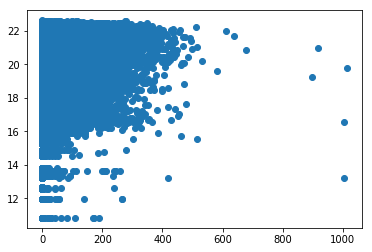

In [18]:
plt.scatter(y_test, y_pred)